In [5]:
# External Libraries
from PIL import Image
import os
import math
import pathlib
from IPython.display import Image
import collections

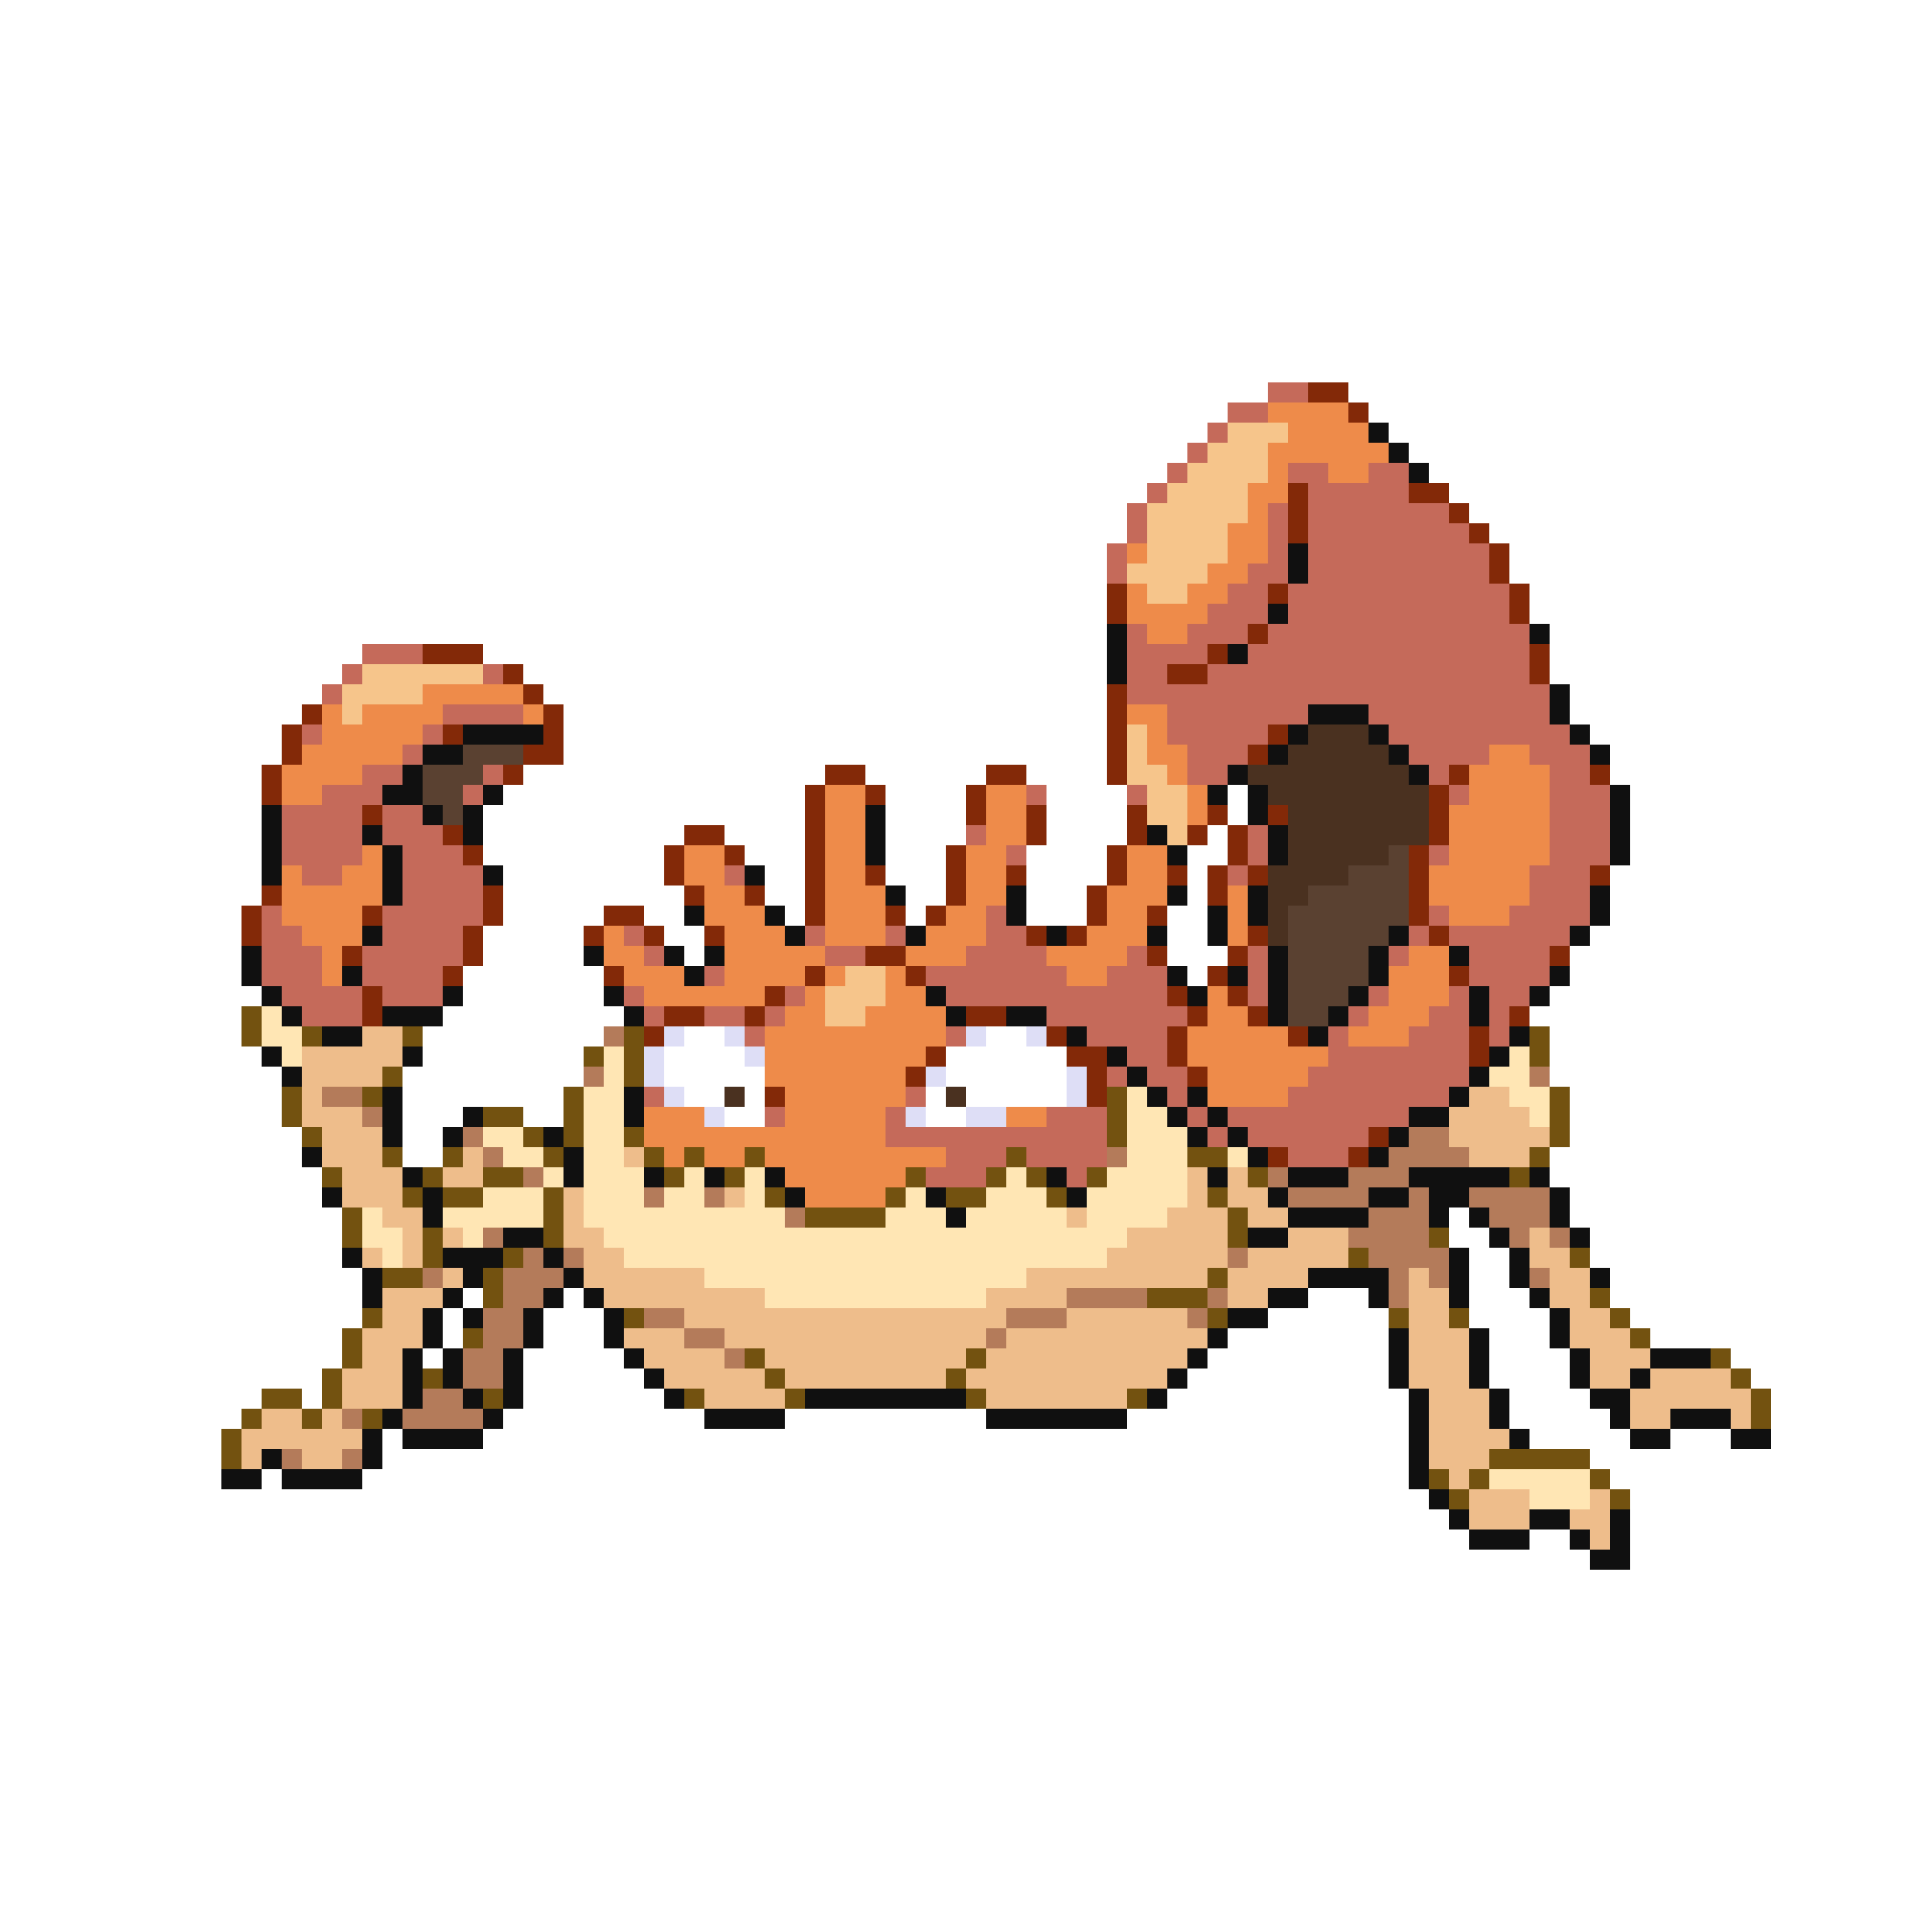

In [44]:
# Make directries (recursively) if not exist.
pathlib.Path("./data/pokemon_scaled_sprites/").mkdir(parents=True, exist_ok=True)

# Interger scale (Nearest Neighbor Scaling) image to at least 2160px (width)
for file in os.listdir("../DataScraping/data/pokemon_sprites/"):
    im = PIL.Image.open(f"../DataScraping/data/pokemon_sprites/{file}")
    
    # Calculate new size
    w, h = im.size
    ratio = math.ceil(2160/w)
    
    # Save
    im = im.resize([w * ratio, h * ratio], resample=PIL.Image.NEAREST)
    im.save(f"./data/pokemon_scaled_sprites/{file}", format="png")
im

### Below this are testing

In [6]:
seen = set()
lengths = collections.defaultdict(int)
# Interger scale (Nearest Neighbor Scaling) image to at least 2160px (width)
for file in os.listdir("../DataScraping/data/pokemon_sprites_pokeapi/"):
    im = PIL.Image.open(f"../DataScraping/data/pokemon_sprites_pokeapi/{file}")
    
    pix = im.load()
    w, h = im.size
    colors = set([pix[x,y] for x in range(w) for y in range(h)])
    seen = seen.union(colors)
    lengths[len(colors)] += 1

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


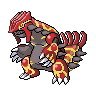

In [8]:
im = PIL.Image.open(f"../DataScraping/data/pokemon_sprites_pokeapi/10078_groudon.png")
pix = im.load()
w, h = im.size
print(set([pix[x,y] for x in range(w) for y in range(h)]))
im

In [9]:
print(sum(val for key, val in lengths.items() if key < 16))
print(lengths)

572
defaultdict(<class 'int'>, {15: 181, 13: 108, 12: 69, 16: 195, 14: 144, 11: 36, 20: 6, 17: 14, 21: 5, 22: 1, 19: 6, 28: 1, 25: 2, 24: 1, 18: 5, 27: 2, 9: 7, 8: 2, 10: 23, 7: 2, 29: 1, 647: 1, 1025: 1, 1181: 2, 683: 1, 1233: 1, 1467: 1, 757: 1, 838: 1, 1372: 1, 498: 2, 807: 1, 768: 1, 693: 1, 877: 1, 439: 1, 580: 1, 1214: 1, 563: 1, 1470: 1, 942: 1, 675: 1, 1157: 1, 940: 1, 1219: 1, 342: 1, 814: 1, 1429: 2, 712: 1, 1262: 1, 554: 2, 1521: 1, 476: 1, 964: 1, 1200: 1, 470: 1, 825: 1, 857: 1, 783: 1, 400: 1, 797: 1, 1160: 1, 1006: 1, 1462: 1, 1022: 1, 533: 1, 1551: 1, 601: 1, 1012: 1, 411: 1, 1383: 1, 1047: 1, 350: 1, 557: 1, 1721: 1, 631: 1, 1063: 1, 1381: 1, 792: 1, 994: 1, 2038: 1, 1605: 1, 1132: 1, 1192: 1, 955: 1, 1234: 1, 1881: 1, 2061: 1, 1042: 1, 1925: 1, 1263: 1, 1239: 1, 2520: 1, 976: 1, 1667: 1, 930: 1, 958: 1, 525: 1, 523: 1, 3175: 1, 4386: 1, 4133: 1, 6489: 1})


In [10]:
len(seen)

63444

## Experiment with custom scaling

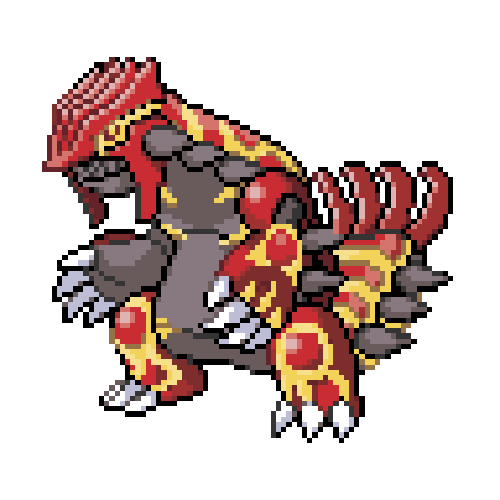

In [19]:
im = PIL.Image.open(f"../DataScraping/data/pokemon_sprites_pokeapi/10078_groudon.png")
im = im.resize([500, 500], resample=PIL.Image.NEAREST)
im2 = im.load()
im_ = im.copy()
im1 = im_.load()
im

In [20]:
R, C = im.size
r = 4
for x in range(C):
    for y in range(R):
        freq = collections.Counter()
        for dx in range(-r, r):
            for dy in range(-r, r):
                nx = x + dx
                ny = y + dy
                if 0 <= nx < C and 0 <= ny < R and (abs(x - nx)**2 + abs(ny - y)**2) <= r**2:
                    freq[im1[nx, ny]] += 1
        im2[x, y] = freq.most_common(1)[0][0]
    if x % 100 == 0:
        print(x)

0
100
200
300
400


In [21]:
im.save("./data/test.png", format="png")

In [27]:
import skimage
from skimage import io, transform
import numpy as np

In [28]:
im =  skimage.io.imread(f"../DataScraping/data/pokemon_sprites_pokeapi/10078_groudon.png")
im = skimage.transform.resize(im, [120, 120, 4], order=0, mode="edge")
im2 = np.copy(im)
skimage.io.imshow(im2)
skimage.io.show()

<Figure size 640x480 with 1 Axes>

In [29]:
X, Y, Z = im.shape
r = 2
for x in range(X):
    for y in range(Y):
        freq = collections.Counter()
        for dx in range(-r//2, r//2):
            for dy in range(-r//2, r//2):
                nx = x + dx
                ny = y + dy
                if 0 <= nx < X and 0 <= ny < Y and (abs(x - nx)**2 + abs(ny - y)**2) <= r**2:
                    freq[im[nx, ny]] += 1
        im2[x,y] = freq.most_common(1)[0][0]
    if x % 100 == 0:
        print(x)
skimage.io.imshow(im2)
skimage.io.show()

TypeError: unhashable type: 'numpy.ndarray'

In [223]:
skimage.io.imsave("./data/test.png", im2)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [28]:
im =  skimage.io.imread(f"../DataScraping/data/pokemon_sprites/10078.png")
im[:, 40]

array([[  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [213, 115, 109, 255],
       [213, 115, 109, 255],
       [213, 115, 109, 255],
       [201,  44,  51, 255],
       [201,  44,  51, 255],
       [ 52,  52,  52, 255],
       [136, 121, 129, 255],
       [136, 121, 129, 255],
       [136, 121, 129, 255],
       [  0,   0,   0, 255],
       [105,  90,  91, 255],
       [105,  90,  91, 255],
       [105,  

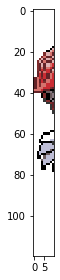

In [31]:
skimage.io.imshow(im[:, 11:21])
skimage.io.show()